one hot encoding vector size is  42
epochs : 0
Epoch 1/1
 - 1s - loss: 3.8554 - acc: 0.0175


C:\Users\MinhoLee\Anaconda3\envs\venv\lib\site-packages\keras-2.2.0-py3.6.egg\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc


epochs : 1
Epoch 1/1
 - 0s - loss: 3.6025 - acc: 0.0526
epochs : 2
Epoch 1/1
 - 0s - loss: 3.4875 - acc: 0.1053
epochs : 3
Epoch 1/1
 - 0s - loss: 3.3191 - acc: 0.1404
epochs : 4
Epoch 1/1
 - 0s - loss: 3.3011 - acc: 0.1228
epochs : 5
Epoch 1/1
 - 0s - loss: 2.9387 - acc: 0.2105
epochs : 6
Epoch 1/1
 - 0s - loss: 2.8142 - acc: 0.1930
epochs : 7
Epoch 1/1
 - 0s - loss: 2.6716 - acc: 0.1930
epochs : 8
Epoch 1/1
 - 0s - loss: 2.5252 - acc: 0.2982
epochs : 9
Epoch 1/1
 - 0s - loss: 2.2653 - acc: 0.3684


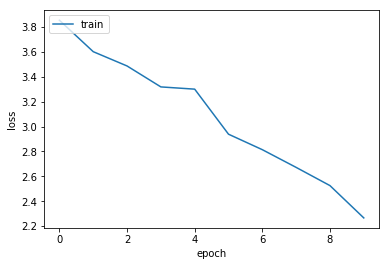

57/57 [==============================] - 0s 5ms/step
acc: 26.32%
one step prediction :  ['f10', 'i4', 'h8', 'g4', 'i8', 'f11', 'f12', 'b11', 'd12', 'i8', 'g8', 'f13', 'z1', 'z1', 'd12', 'd12', 'i8', 'g8', 'g8', 'd10', 'd10', 'c9', 'g9', 'g9', 'f8', 'f8', 'b13', 'z1', 'z1', 'd12', 'i8', 'g8', 'g8', 'b12', 'z1', 'z1', 'd12', 'd4', 'g8', 'g8', 'd10', 'c9', 'g9', 'z1', 'c11', 'd12', 'i8', 'g8', 'f13', 'd10', 'c9', 'g9', 'g9', 'f8', 'f8', 'f8', 'd8', 'b13', 'b13', 'z1', 'c11']
full song prediction :  ['f10', 'i4', 'h8', 'g4', 'i8', 'f11', 'f12', 'b11', 'd12', 'i8', 'g8', 'f13', 'z1', 'z1', 'd12', 'd12', 'i8', 'g8', 'g8', 'd10', 'd10', 'c9', 'g9', 'f8', 'f8', 'd8', 'b13', 'b14', 'z1', 'd12', 'j4', 'i8', 'g8', 'f13', 'f14', 'z1', 'b4', 'd12', 'i8', 'g8', 'f13', 'f14', 'z1', 'd12', 'd12', 'i8', 'g8', 'g8', 'd10', 'd10', 'c9', 'g9', 'f8', 'f8', 'd8', 'b13', 'b14', 'z1', 'd12', 'j4', 'i8']


In [12]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset_X = []
    dataset_Y = []
    
    for i in range(len(seq)-window_size):
        
        subset = seq[i:(i+window_size+1)]
        
        for si in range(len(subset)-1):
            features = code2features(subset[si])            
            dataset_X.append(features)

        dataset_Y.append([code2idx[subset[window_size]]])
        
    return np.array(dataset_X), np.array(dataset_Y)

# 속성 변환 함수
def code2features(code):
    features = []
    features.append(code2scale[code[0]]/float(max_scale_value))
    features.append(code2length[code[1:]])
    return features

# 1. 데이터 준비하기

# 코드 사전 정의
# 4분음표 a4:도/ b4:레/ c4:미/ d4:파/ e4:솔/ f4:라/ g4:시/ h4:도/ i4:레 / j4:미
# 8분음표 a8:도/ b8:레/ c8:미/ d8:파/ e8:솔/ f8:라/ g8:시/ h8:도/ i8:레 / j8:미


# b11: 레 4분음표 시작~
# b14: 레 4분음표 ~ 끝
# b13 : 레 점4분음표 시작~
# b12: 레 8분음표 ~ 끝


# c12: 미 8분음표 ~ 끝 
# c9: 미 이상한거 시작
# c11: 미 4분음표 시작~
# c13: 미 8분음표 시작~

# d11: 파 4분음표 시작~
# d12: 파 8분음표 ~ 끝
# d10: 파 점4분음표

# e9: 솔 이상한거 끝

# f10: 라 점4분음표
# f11: 라 4분음표 시작~
# f12: 라 8분음표 ~ 끝
# f13: 라 점4분음표 시작~ 
# f14: 라 4분음표 ~끝

# g9: 시 이상한거 끝
# q1: 점 4분음표 낮은시

# h12: 높은 도 8분음표 ~ 끝

# i11: 높은 레 4분음표 시작~

# z1: 8분 쉼표

max_scale_value = 11.0

code2scale = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5, 'g':6, 'h':7, 'i':8, 'j':9, 'z':10, 'q':11}
code2length = {'4':0, '8':1, '9':2, '10':3, '11':4,'12':5,'13':6,'14':7,'1':8}


code2idx = { 'a4':0, 'b4':1, 'c4':2, 'd4':3, 'e4':4, 'f4':5, 'g4':6, 'h4':7, 'i4':8, 'j4':9 ,
             'a8':10, 'b8':11,'c8':12,'d8':13,'e8':14,'f8':15,'g8':16,'h8':17,'i8':18, 'j8':19 ,
             'b11':20, 'b12':21, 'b13':22, 'b14':23, 'c12':24, 'c9':25, 'c11':26, 'c13':27, 'd11':28, 'd12':29, 'd10':30, 'e9':31,
             'f10':32,'f11':33, 'f12':34, 'f13':35,'f14':36, 'g9':37, 'q1':38, 'h12':39, 'i11':40, 'z1':41
           }

idx2code = { 0:'a4', 1: 'b4', 2:'c4', 3:'d4',4: 'e4',5: 'f4',6: 'g4',7: 'h4',8: 'i4',9: 'j4',
             10: 'a8', 11:'b8',12:'c8',13:'d8',14:'e8',15:'f8',16:'g8',17:'h8',18:'i8',19: 'j8' ,
             20: 'b11', 21:'b12', 22:'b13',23: 'b14',24: 'c12',25: 'c9',26: 'c11',27: 'c13',28: 'd11',29: 'd12',30: 'd10',31:'e9',
             32:'f10',33:'f11',34: 'f12',35: 'f13',36:'f14', 37:'g9',38: 'q31',39: 'h12',40: 'i11',41: 'z1'}


seq = ['f10','i4', 'h8', 'g4', 'i8', 'f11', 'f12', 'b11', 'c12', 'd4', 'g8', 'f13', 'f14', 'z1',
       'd11', 'd12', 'g4', 'b8', 'f4', 'e8', 'd10', 'e4', 'd8','c9', 'g9', 'f8', 'b13', 'b14', 'z1', 
       'c11', 'd12', 'e4', 'd8', 'c13', 'b12', 'a8', 'q1','b4', 'c8', 'd4', 'g8', 'f13', 'f14','z1', 
       'i11','h12', 'j4', 'i8', 'h8', 'g8', 'f8','d10', 'c9', 'g9', 'f8', 'c9', 'e9', 'd8', 'b13', 'b14', 'z1'
      ]
# 2. 데이터셋 생성하기

x_train, y_train = seq2dataset(seq, window_size = 4)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (len(seq)-4, 4, 2))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 2), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 10

history = LossHistory() # 손실 이력 객체 생성
history.init()

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3)

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history, early_stopping]) # 50 is X.shape[0]
    model.reset_states()
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = len(seq)-4 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['f10','i4', 'h8', 'g4']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

model.reset_states()

# 곡 전체 예측

seq_in = ['f10','i4', 'h8', 'g4']
seq_out = seq_in

seq_in_featrues = []

for si in seq_in:
    features = code2features(si)
    seq_in_featrues.append(features)

for i in range(pred_count):
    sample_in = np.array(seq_in_featrues)
    sample_in = np.reshape(sample_in, (1, 4, 2)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    
    features = code2features(idx2code[idx])
    seq_in_featrues.append(features)
    seq_in_featrues.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)